In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons, make_circles


def plot_decision_boundary(model, X, y, title=None):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    if title:
        plt.title(title)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.show()


In [2]:
data = datasets.load_breast_cancer()
X, y = data.data, data.target
print("X shape:", X.shape, "| y positive rate:", y.mean().round(3))


X shape: (569, 30) | y positive rate: 0.627


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [4]:
linear_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LinearSVC(C=1.0, max_iter=10000, random_state=42))
])
linear_clf.fit(X_train, y_train)

y_pred_lin = linear_clf.predict(X_test)
acc_lin = accuracy_score(y_test, y_pred_lin)
print("Linear SVM accuracy:", round(acc_lin, 4))
print("Linear SVM confusion matrix:\n", confusion_matrix(y_test, y_pred_lin))
print("Linear SVM classification report:\n",
      classification_report(y_test, y_pred_lin, digits=3))


Linear SVM accuracy: 0.9649
Linear SVM confusion matrix:
 [[40  2]
 [ 2 70]]
Linear SVM classification report:
               precision    recall  f1-score   support

           0      0.952     0.952     0.952        42
           1      0.972     0.972     0.972        72

    accuracy                          0.965       114
   macro avg      0.962     0.962     0.962       114
weighted avg      0.965     0.965     0.965       114



In [5]:
rbf_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42))
])
rbf_clf.fit(X_train, y_train)

y_pred_rbf = rbf_clf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF SVM accuracy:", round(acc_rbf, 4))
print("RBF SVM confusion matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("RBF SVM classification report:\n",
      classification_report(y_test, y_pred_rbf, digits=3))


RBF SVM accuracy: 0.9825
RBF SVM confusion matrix:
 [[41  1]
 [ 1 71]]
RBF SVM classification report:
               precision    recall  f1-score   support

           0      0.976     0.976     0.976        42
           1      0.986     0.986     0.986        72

    accuracy                          0.982       114
   macro avg      0.981     0.981     0.981       114
weighted avg      0.982     0.982     0.982       114



In [6]:
cv_lin = cross_val_score(linear_clf, X, y, cv=5).mean()
cv_rbf = cross_val_score(rbf_clf, X, y, cv=5).mean()
print("CV mean (Linear):", round(cv_lin, 4))
print("CV mean (RBF)   :", round(cv_rbf, 4))


CV mean (Linear): 0.9667
CV mean (RBF)   : 0.9736


In [7]:
param_grid = {
    "svc__C": [0.1, 1, 10, 100],
    "svc__gamma": ["scale", 0.1, 0.01, 0.001]
}

grid = GridSearchCV(rbf_clf, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best RBF params:", grid.best_params_)
best_rbf = grid.best_estimator_
best_test_pred = best_rbf.predict(X_test)
best_acc = accuracy_score(y_test, best_test_pred)
print("Best RBF test accuracy:", round(best_acc, 4))


Best RBF params: {'svc__C': 10, 'svc__gamma': 0.01}
Best RBF test accuracy: 0.9825


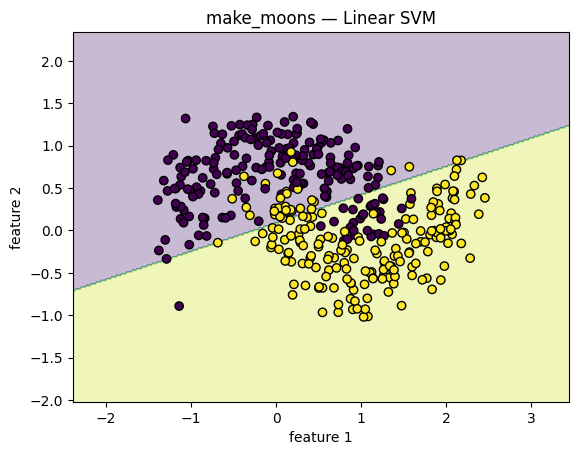

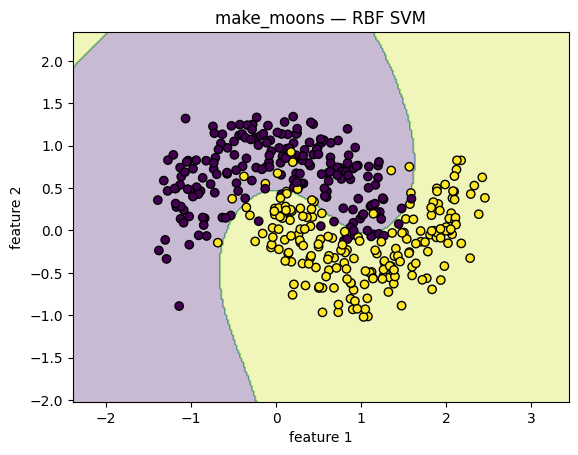

In [ ]:

X_m, y_m = make_moons(n_samples=400, noise=0.25, random_state=42)

svm_lin_moons = SVC(kernel="linear", C=1.0, random_state=42).fit(X_m, y_m)
plot_decision_boundary(svm_lin_moons, X_m, y_m, "make_moons — Linear SVM")

svm_rbf_moons = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42).fit(X_m, y_m)
plot_decision_boundary(svm_rbf_moons, X_m, y_m, "make_moons — RBF SVM")


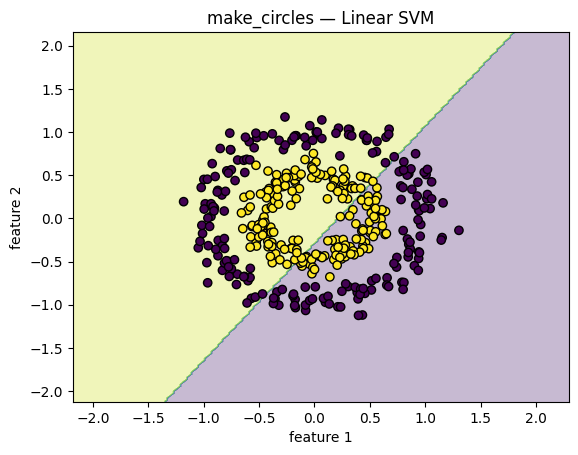

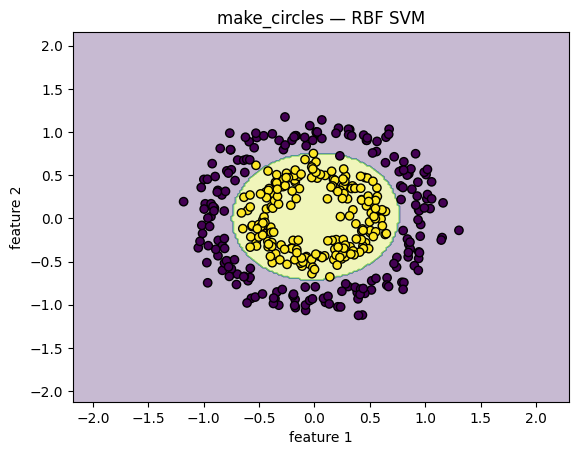

In [9]:

X_c, y_c = make_circles(n_samples=400, factor=0.5, noise=0.1, random_state=42)

svm_lin_circ = SVC(kernel="linear", C=1.0, random_state=42).fit(X_c, y_c)
plot_decision_boundary(svm_lin_circ, X_c, y_c, "make_circles — Linear SVM")

svm_rbf_circ = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42).fit(X_c, y_c)
plot_decision_boundary(svm_rbf_circ, X_c, y_c, "make_circles — RBF SVM")


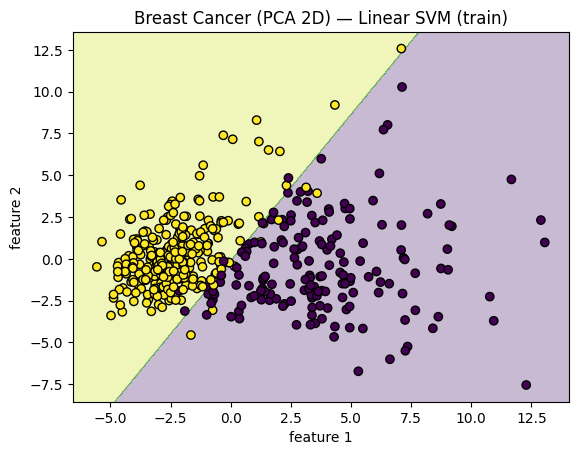

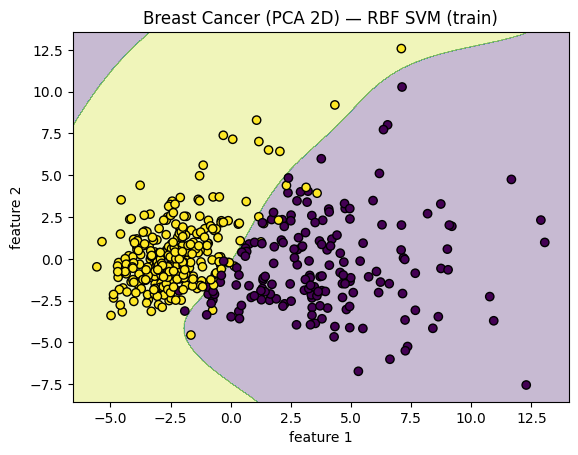

PCA-2D Linear test acc: 0.9474
PCA-2D RBF test acc: 0.9474


In [10]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)


Xp_train, Xp_test, yp_train, yp_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)


svm_lin_2d = SVC(kernel="linear", C=1.0, random_state=42).fit(Xp_train, yp_train)
plot_decision_boundary(svm_lin_2d, Xp_train, yp_train,
                       "Breast Cancer (PCA 2D) — Linear SVM (train)")


svm_rbf_2d = SVC(kernel="rbf", C=grid.best_params_.get("svc__C", 1.0),
                 gamma="scale", random_state=42).fit(Xp_train, yp_train)
plot_decision_boundary(svm_rbf_2d, Xp_train, yp_train,
                       "Breast Cancer (PCA 2D) — RBF SVM (train)")


print("PCA-2D Linear test acc:",
      round(accuracy_score(yp_test, svm_lin_2d.predict(Xp_test)), 4))
print("PCA-2D RBF test acc:",
      round(accuracy_score(yp_test, svm_rbf_2d.predict(Xp_test)), 4))


In [11]:
summary = {
    "linear_test_accuracy": round(acc_lin, 4),
    "rbf_test_accuracy": round(acc_rbf, 4),
    "cv_mean_linear": round(cv_lin, 4),
    "cv_mean_rbf": round(cv_rbf, 4),
    "best_rbf_params": grid.best_params_,
    "best_rbf_test_accuracy": round(best_acc, 4),
}
print(summary)


{'linear_test_accuracy': 0.9649, 'rbf_test_accuracy': 0.9825, 'cv_mean_linear': np.float64(0.9667), 'cv_mean_rbf': np.float64(0.9736), 'best_rbf_params': {'svc__C': 10, 'svc__gamma': 0.01}, 'best_rbf_test_accuracy': 0.9825}
